In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
from sklearn.linear_model import LinearRegression


In [4]:
df=pd.read_csv('Data1310087101_databaseLoadingData.csv')
df.head()

,REF_DATE,GEO,DGUID,Measure,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,Jan-22,"Weighted average, cities measured",NaN,Amphetamine,Load per capita (milligrams per one thousand p...,Milligrams per one thousand people per day (mg...,442,units,0,v1566927744,1.1.1,122.18,NaN,NaN,NaN,2
1,Feb-22,"Weighted average, cities measured",NaN,Amphetamine,Load per capita (milligrams per one thousand p...,Milligrams per one thousand people per day (mg...,442,units,0,v1566927744,1.1.1,89.28,NaN,NaN,NaN,2
2,Mar-22,"Weighted average, cities measured",NaN,Amphetamine,Load per capita (milligrams per one thousand p...,Milligrams per one thousand people per day (mg...,442,units,0,v1566927744,1.1.1,115.72,NaN,NaN,NaN,2
3,Apr-22,"Weighted average, cities measured",NaN,Amphetamine,Load per capita (milligrams per one thousand p...,Milligrams per one thousand people per day (mg...,442,units,0,v1566927744,1.1.1,110.88,NaN,NaN,NaN,2
4,May-22,"Weighted average, cities measured",NaN,Amphetamine,Load per capita (milligrams per one thousand p...,Milligrams per one thousand people per day (mg...,442,units,0,v1566927744,1.1.1,113.62,NaN,NaN,NaN,2


# Data Wrangling

In [5]:
df=df[['REF_DATE','GEO', 'VALUE', 'Measure']]

## Ref Date column

In [6]:
df['GEO'].unique()

array(['Weighted average, cities measured', 'Halifax, Nova Scotia',
       'Montreal, Quebec', 'Toronto, Ontario',
       'Prince Albert, Saskatchewan', 'Saskatoon, Saskatchewan',
       'Edmonton, Alberta', 'Vancouver, British Columbia'], dtype=object)

In [7]:
df.dtypes

REF_DATE     object
GEO          object
VALUE       float64
Measure      object
dtype: object

In [8]:
df['REF_DATE'] = df['REF_DATE'].str.replace(r'-(22|23)$', r'-20\1', regex=True)
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%b-%Y')
df.dtypes

REF_DATE    datetime64[ns]
GEO                 object
VALUE              float64
Measure             object
dtype: object

In [9]:
df['REF_DATE'] = df['REF_DATE'].dt.to_period('M')
df['REF_DATE'] = df['REF_DATE'].astype(str)
df

,REF_DATE,GEO,VALUE,Measure
0,2022-01,"Weighted average, cities measured",122.18,Amphetamine
1,2022-02,"Weighted average, cities measured",89.28,Amphetamine
2,2022-03,"Weighted average, cities measured",115.72,Amphetamine
3,2022-04,"Weighted average, cities measured",110.88,Amphetamine
4,2022-05,"Weighted average, cities measured",113.62,Amphetamine
...,...,...,...,...
1195,2022-11,"Vancouver, British Columbia",3.66,Oxycodone
1196,2022-12,"Vancouver, British Columbia",3.68,Oxycodone
1197,2023-01,"Vancouver, British Columbia",2.64,Oxycodone
1198,2023-03,"Vancouver, British Columbia",3.72,Oxycodone


In [10]:
df.dtypes

REF_DATE     object
GEO          object
VALUE       float64
Measure      object
dtype: object

## Missing values with 0

In [11]:
df['VALUE']=df['VALUE'].fillna(0)
df['VALUE'].isnull().sum()

0

## Dropping rows having "Weighted average, cities measured" in Geo column

In [12]:
# Drop rows where 'City' column contains the specified value
df = df[df['GEO'] != 'Weighted average, cities measured']
df

,REF_DATE,GEO,VALUE,Measure
150,2022-01,"Halifax, Nova Scotia",71.82,Amphetamine
151,2022-02,"Halifax, Nova Scotia",106.64,Amphetamine
152,2022-03,"Halifax, Nova Scotia",123.94,Amphetamine
153,2022-04,"Halifax, Nova Scotia",100.76,Amphetamine
154,2022-05,"Halifax, Nova Scotia",88.36,Amphetamine
...,...,...,...,...
1195,2022-11,"Vancouver, British Columbia",3.66,Oxycodone
1196,2022-12,"Vancouver, British Columbia",3.68,Oxycodone
1197,2023-01,"Vancouver, British Columbia",2.64,Oxycodone
1198,2023-03,"Vancouver, British Columbia",3.72,Oxycodone


## Marking drugs as precribed and unprecibed

In [13]:
# List of prescribed drugs
prescribed_drugs = ['Cannabis (THC-COOH)', 'Codeine', 'Fentanyl (Norfentanyl)', 'Methadone', 'Morphine', 'Oxycodone']
# Create a new column 'Prescribed' based on whether the drug is in the prescribed list
df['Prescribed'] = df['Measure'].apply(lambda x: 'Prescribed' if x in prescribed_drugs else 'Unprescribed')
df.head()

C:\Users\warda\AppData\Local\Temp\ipykernel_20040\3754758868.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prescribed'] = df['Measure'].apply(lambda x: 'Prescribed' if x in prescribed_drugs else 'Unprescribed')


,REF_DATE,GEO,VALUE,Measure,Prescribed
150,2022-01,"Halifax, Nova Scotia",71.82,Amphetamine,Unprescribed
151,2022-02,"Halifax, Nova Scotia",106.64,Amphetamine,Unprescribed
152,2022-03,"Halifax, Nova Scotia",123.94,Amphetamine,Unprescribed
153,2022-04,"Halifax, Nova Scotia",100.76,Amphetamine,Unprescribed
154,2022-05,"Halifax, Nova Scotia",88.36,Amphetamine,Unprescribed


# EDA FOR EACH DRUG (Horizontal bar chart)

<string>:37: SyntaxWarning:

invalid escape sequence '\{'

<>:37: SyntaxWarning:

invalid escape sequence '\{'

<>:37: SyntaxWarning:

invalid escape sequence '\T'

<string>:37: SyntaxWarning:

invalid escape sequence '\{'

<>:37: SyntaxWarning:

invalid escape sequence '\{'

<>:37: SyntaxWarning:

invalid escape sequence '\T'

C:\Users\warda\AppData\Local\Temp\ipykernel_15476\447283117.py:37: SyntaxWarning:

invalid escape sequence '\{'

C:\Users\warda\AppData\Local\Temp\ipykernel_15476\447283117.py:37: SyntaxWarning:

invalid escape sequence '\T'

C:\Users\warda\AppData\Local\Temp\ipykernel_15476\447283117.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




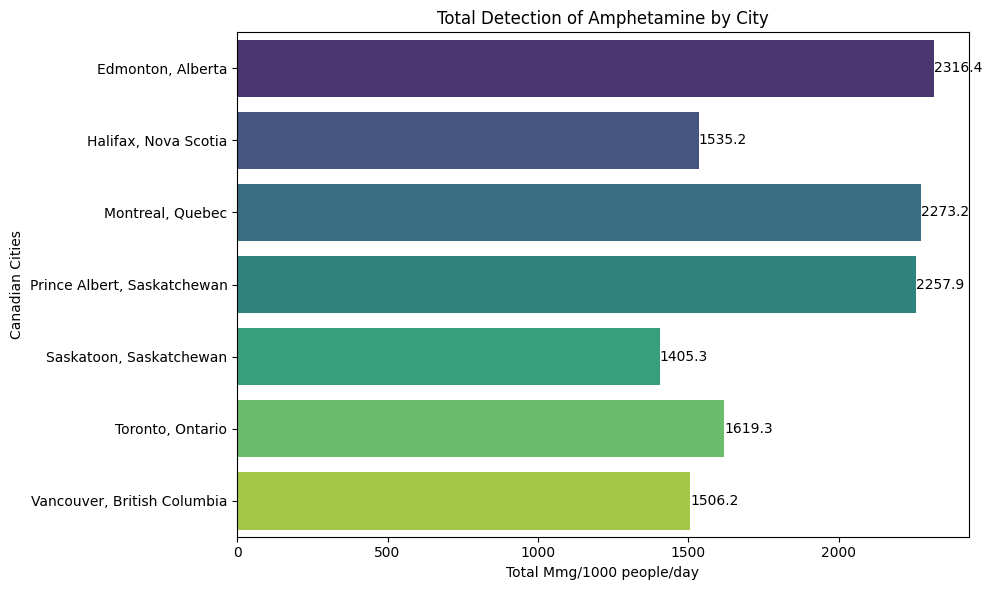

C:\Users\warda\AppData\Local\Temp\ipykernel_15476\447283117.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




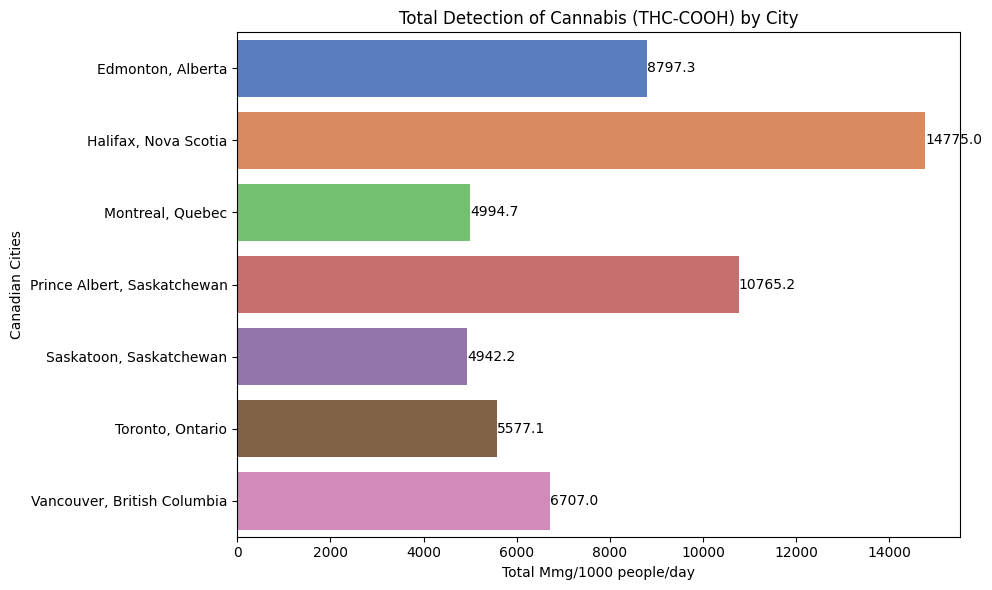

C:\Users\warda\AppData\Local\Temp\ipykernel_15476\447283117.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




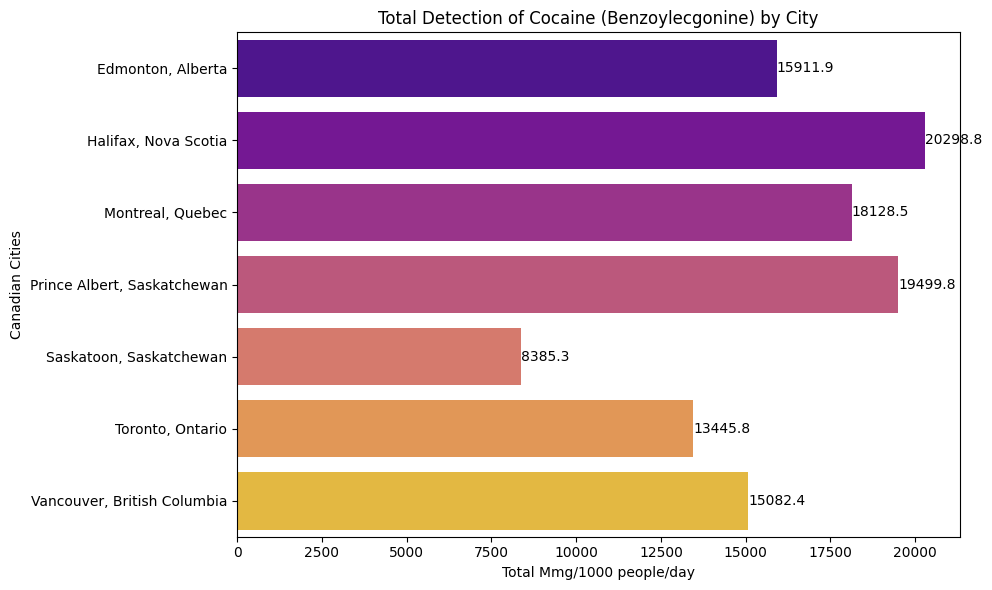

C:\Users\warda\AppData\Local\Temp\ipykernel_15476\447283117.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




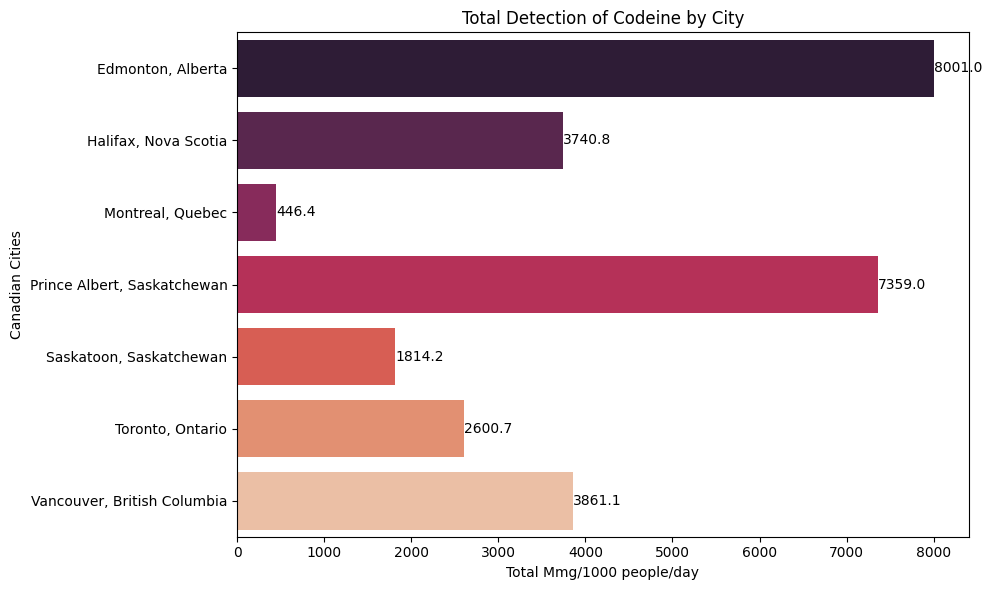

C:\Users\warda\AppData\Local\Temp\ipykernel_15476\447283117.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




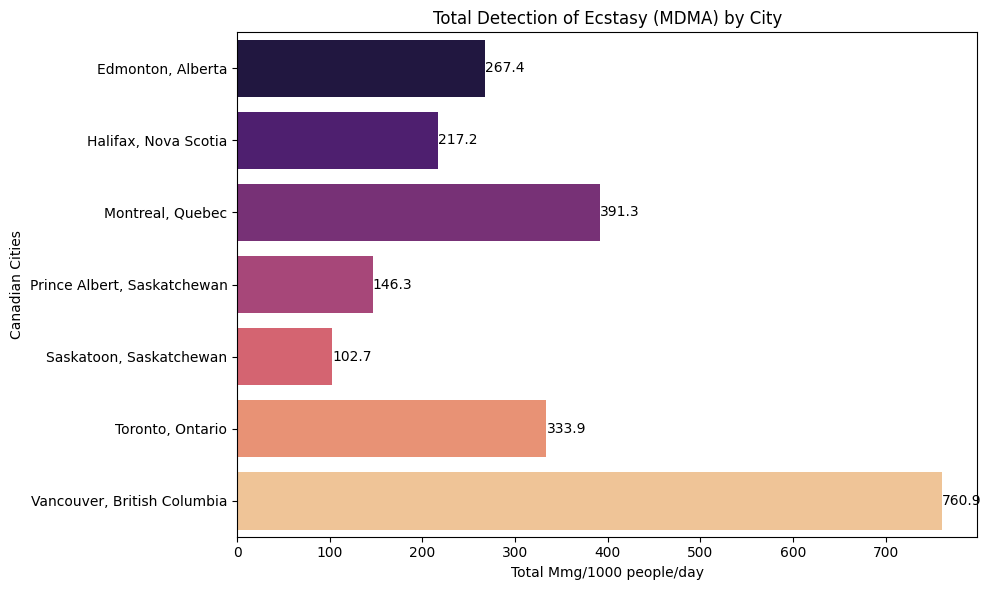

C:\Users\warda\AppData\Local\Temp\ipykernel_15476\447283117.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




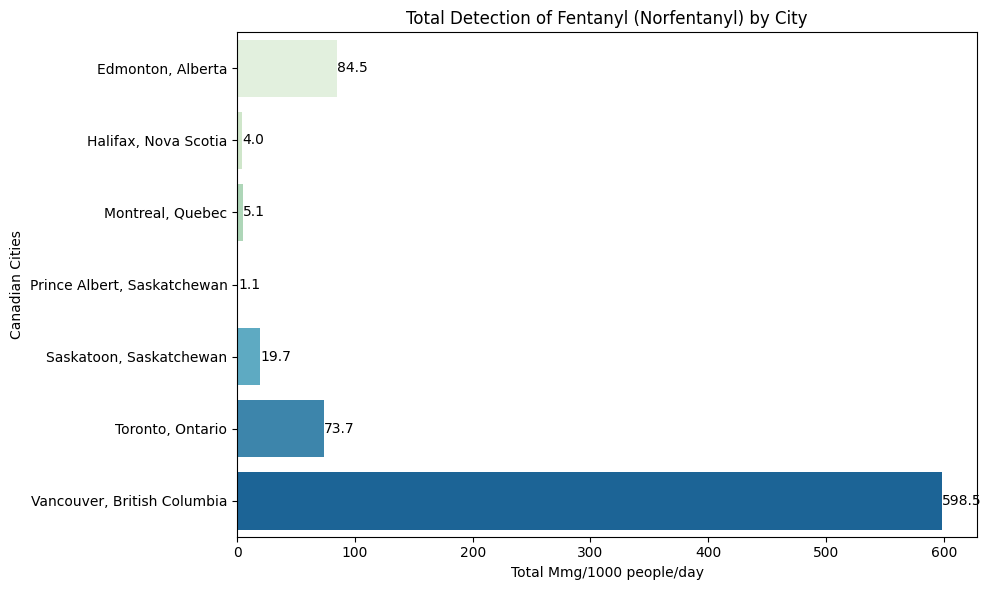

C:\Users\warda\AppData\Local\Temp\ipykernel_15476\447283117.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




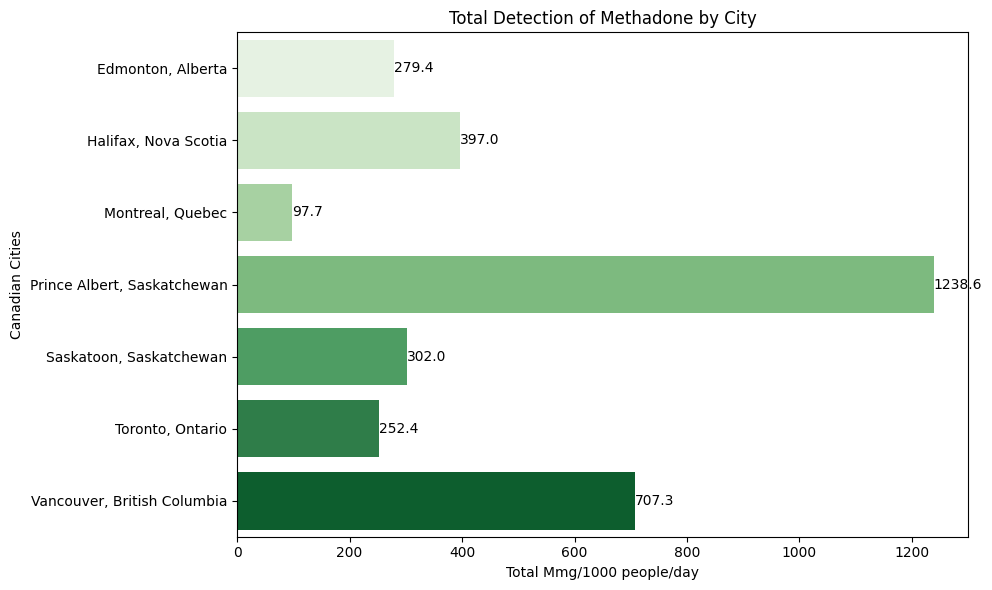

C:\Users\warda\AppData\Local\Temp\ipykernel_15476\447283117.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




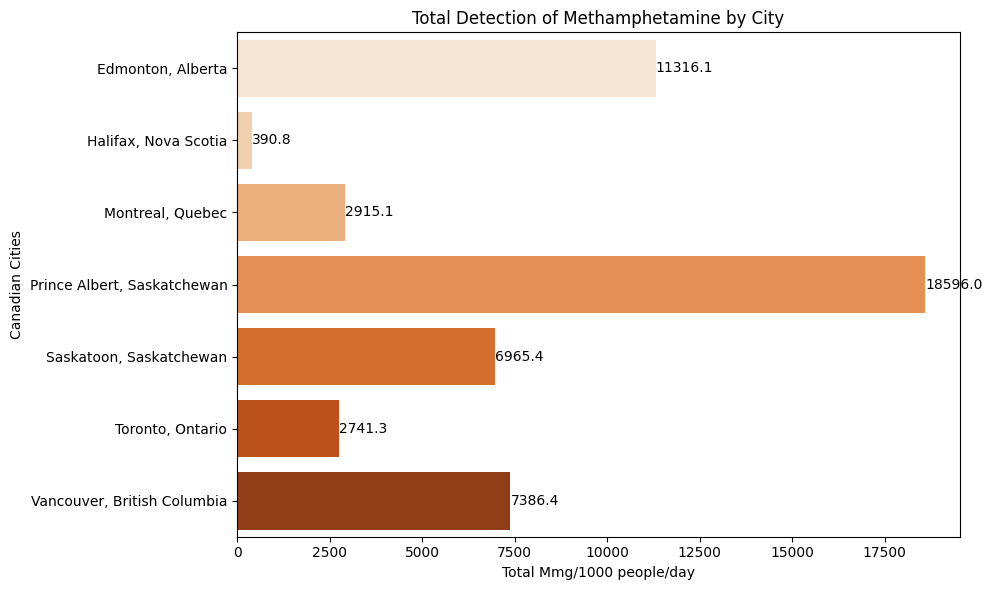

C:\Users\warda\AppData\Local\Temp\ipykernel_15476\447283117.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




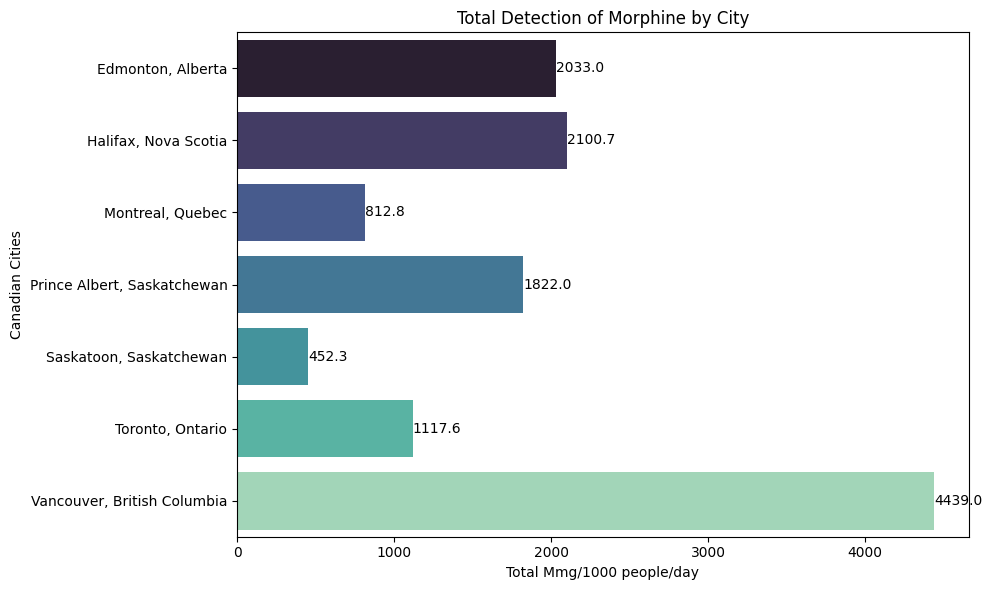

C:\Users\warda\AppData\Local\Temp\ipykernel_15476\447283117.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




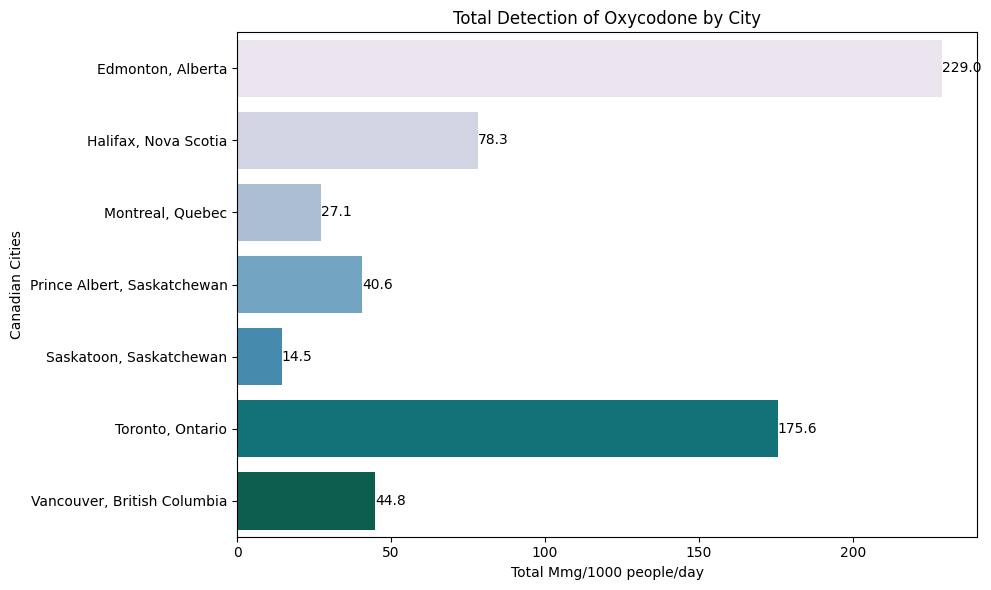

In [109]:
# Assuming df is your DataFrame
# Group by GEO and Measure to calculate the sum of consumption (VALUE)
grouped_data = df.groupby(['GEO', 'Measure'])['VALUE'].sum().reset_index()

# Get the list of unique measures (drugs)
unique_measures = grouped_data['Measure'].unique()
palette=['viridis', 'muted', 'plasma', 'rocket', 'magma', 'GnBu', 'Greens', 'Oranges', 'mako', 'PuBuGn', 'YlGnBu']
i=0

# Define the x-axis limit
#x_limit = grouped_data['VALUE'].max()

# Plotting each Measure's consumption for different GEOs
for measure in unique_measures:
    # Filter the data for the current measure
    measure_data = grouped_data[grouped_data['Measure'] == measure]
    
    # Plotting a horizontal bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x='VALUE', y='GEO', data=measure_data, palette=palette[i % len(palette)])
    i += 1
    
    # Adding titles and labels
    plt.title(f'Total Detection of {measure} by City')
    plt.xlabel('Total Mmg/1000 people/day')
    plt.ylabel('Canadian Cities')
    
    # Set the x-axis limit
    #plt.xlim(0, x_limit)
    
    # Annotating values on the bars
    for index, value in enumerate(measure_data['VALUE']):
        plt.text(value, index, f'{value:.1f}', va='center', ha='left', color='black')
    
    # Save the plot as an image
    plt.tight_layout()
    plt.savefig(f'Drug Metabolites Found in Wastewater\Visualizations\Trend of each drug by city\{measure}_Detection_by_City.png', format='png', dpi=300)
    
    # Show the plot
    plt.show()


In [127]:
## Removing Jan and feb from all cities
df= df[~df['REF_DATE'].isin(['2022-01', '2022-02'])]


## Dropping Saskatoon
df = df[df['GEO'] != 'Saskatoon, Saskatchewan']
df.head()

df.to_csv('Clean Data.csv', index=False)

# Heat map

C:\Users\warda\AppData\Local\Temp\ipykernel_15476\1069999683.py:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



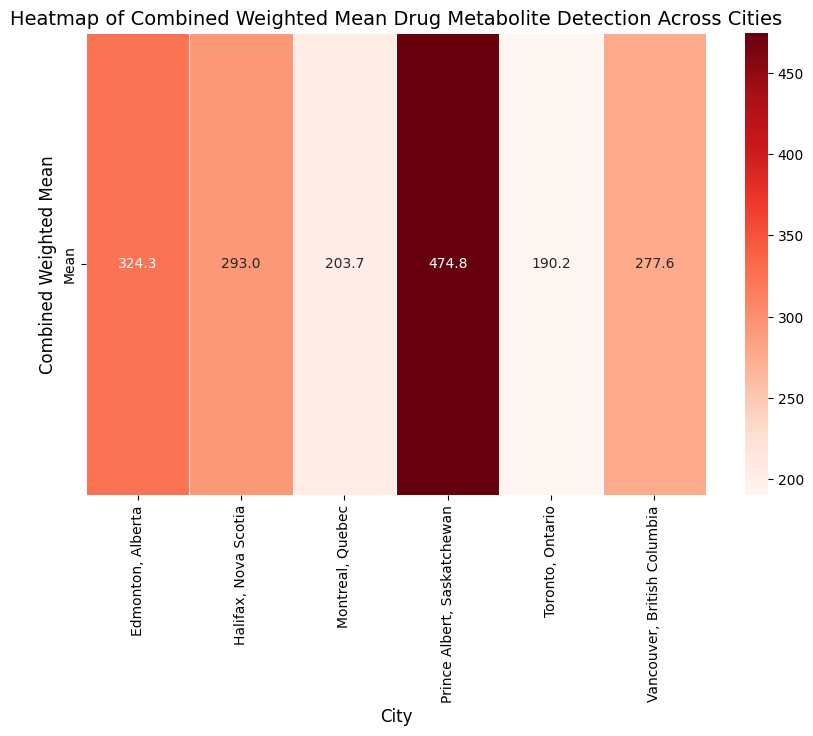

In [114]:
# Function to calculate weighted mean for each GEO across all measures
def calculate_mean(group):
    return np.average(group['VALUE'])

# Group by 'GEO' and calculate the combined weighted mean across all measures
mean_data = df.groupby('GEO').apply(calculate_mean)

# Convert the result into a DataFrame
mean_df = mean_data.reset_index(name='Mean')

# Create a DataFrame for plotting
heatmap_data = pd.DataFrame(mean_df.set_index('GEO'))

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, cmap='Reds', annot=True, fmt=".1f", linewidths=0.5)

# Add labels and title
plt.title('Heatmap of Combined Weighted Mean Drug Metabolite Detection Across Cities', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Combined Weighted Mean', fontsize=12)

# Show the heatmap
plt.show()

In [116]:
# Convert the result into a DataFrame
mean_df = pd.DataFrame(mean_data.tolist(), index=mean_data.index)

# Calculate the overall weighted mean across all months for each city
weighted_mean = mean_df.mean(axis=1).reset_index()

# Rename columns for merging
weighted_mean.columns = ['City', 'Weighted_Mean']

# Remove rows with 'Weighted average, cities measured 7 8'
weighted_mean_per_city = weighted_mean[weighted_mean['City'] != 'Weighted average, cities measured 7 8']

# City coordinates (replace this with actual data if needed)
city_coords = {
    'City': ['Edmonton, Alberta', 'Halifax, Nova Scotia', 'Montreal, Quebec', 'Prince Albert, Saskatchewan', 'Saskatoon, Saskatchewan', 'Toronto, Ontario', 'Vancouver, British Columbia'],
    'Latitude': [53.5461, 44.6488, 45.5017, 53.2033, 52.1579, 43.6510, 49.2827],
    'Longitude': [-113.4938, -63.5752, -73.5673, -105.7531, -106.6700, -79.3470, -123.1207]
}

# Convert the city_coords dictionary into a DataFrame
city_coords_df = pd.DataFrame(city_coords)

# Merge city coordinates with the weighted mean data
# Use .loc to ensure both DataFrames are aligned correctly
merged_data = pd.merge(city_coords_df, weighted_mean_per_city, on='City')

# Check the merged data
print(merged_data)


                          City  Latitude  Longitude  Weighted_Mean
0            Edmonton, Alberta   53.5461  -113.4938     324.283077
1         Halifax, Nova Scotia   44.6488   -63.5752     293.008923
2             Montreal, Quebec   45.5017   -73.5673     203.747692
3  Prince Albert, Saskatchewan   53.2033  -105.7531     474.819692
4             Toronto, Ontario   43.6510   -79.3470     190.228615
5  Vancouver, British Columbia   49.2827  -123.1207     277.612923


In [117]:
# Create a Folium map centered on Canada
m = folium.Map(location=[56.1304, -106.3468], zoom_start=4)

# Create heatmap data (latitude, longitude, weighted mean)
# The third value in each list (weighted mean) is used as the intensity for the heatmap
heat_data = [[row['Latitude'], row['Longitude'], row['Weighted_Mean']] for index, row in merged_data.iterrows()]

# Add heatmap to the map with intensity defined by 'Weighted_Mean'
HeatMap(heat_data, radius=25, blur=15, max_intensity=max(merged_data['Weighted_Mean'])).add_to(m)

# Save the map to an HTML file
m.save("canada_heatmap_intensity.html")

# Display the map (for Jupyter Notebooks)
m

# WEIGHTED MEAN AND LINE CHART FOR TOP 3 CITIES

C:\Users\warda\AppData\Local\Temp\ipykernel_15476\3074080156.py:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



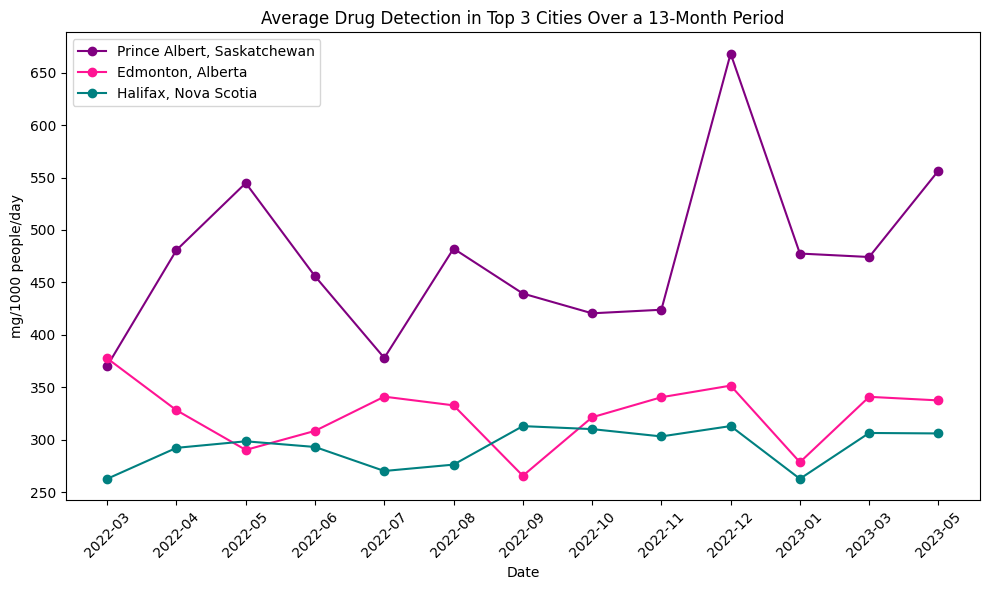

In [118]:
# Function to calculate weighted mean for each GEO and Prescribed status
def calculate_mean(group):
    return np.average(group['VALUE'])

# Group by REF_DATE and GEO, and calculate the weighted mean
mean = df.groupby(['REF_DATE', 'GEO']).apply(calculate_mean).reset_index(name='Mean')

# Calculate the overall mean for each city to find the top 3
top_cities = mean.groupby('GEO')['Mean'].mean().nlargest(3).index

# Filter the weighted mean DataFrame for only the top cities
top_mean = mean[mean['GEO'].isin(top_cities)]

# Set up the plot
plt.figure(figsize=(10, 6))

# Define colors for the top cities
colors = ['purple', 'deeppink', 'teal']

# Plot for each top city
for i, city in enumerate(top_cities):
    city_data = top_mean[top_mean['GEO'] == city]
    plt.plot(city_data['REF_DATE'], city_data['Mean'], marker='o', label=city, color=colors[i])

plt.title('Average Drug Detection in Top 3 Cities Over a 13-Month Period')
plt.xlabel('Date')
plt.ylabel('mg/1000 people/day')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Drug Detection in top 3.png', format='png', dpi=300)
plt.show()


# TREE MAP CHART

In [119]:
# Function to calculate weighted mean for each GEO and Prescribed status
def calculate_mean(group):
    return np.average(group['VALUE'])

# Group by GEO, Prescribed, and Measure to calculate the weighted mean
weighted_mean_data = df.groupby(['GEO', 'Prescribed', 'Measure']).apply(calculate_mean).reset_index(name='Mean')

# Select the top 3 GEO based on the overall weighted mean across both Prescribed and Unprescribed
top_geo = weighted_mean_data.groupby('GEO')['Mean'].mean().nlargest(3).index

# Filter the data to include only the top 3 GEO
top_geo_data = weighted_mean_data[weighted_mean_data['GEO'].isin(top_geo)]

# Create the treemap with text labels
fig = px.treemap(top_geo_data, 
                 path=['GEO', 'Prescribed', 'Measure'],  # Path defines the hierarchy (GEO -> Prescribed -> Measure)
                 values='Mean',  # Size of the blocks
                 color='Mean',   # Color based on weighted mean values
                 color_continuous_scale='Viridis',  # Color scale for the treemap
                 title='Top 3 Cities: Breakdown of Drugs under Prescribed and Unprescribed',
                 hover_data={'Mean': ':.2f'})  # Show Mean values with two decimal places

fig.update_traces(texttemplate='%{label}<br>Mean: %{value:.2f}')  # Add mean values to labels

fig.update_layout(width=1000, height=1000)
fig.write_html("Treemap.html")

# Show the treemap
fig.show()




C:\Users\warda\AppData\Local\Temp\ipykernel_15476\2415632761.py:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



## Standard Deviation of precribed and unprecribed drugs

In [120]:
# Filter the DataFrame for only prescribed drugs
prescribed_drugs = df[df['Prescribed'] == 'Prescribed']  # or the appropriate value for prescribed drugs

# Calculate the standard deviation of 'VALUE' for prescribed drugs
std_deviation_prescribed = prescribed_drugs['VALUE'].std()
std_deviation_prescribed.round(3)

253.997

In [121]:
unprescribed_drugs = df[df['Prescribed'] == 'Unprescribed']  # or the appropriate value for prescribed drugs
# Calculate the standard deviation of 'VALUE' for prescribed drugs
std_deviation_unprescribed = unprescribed_drugs['VALUE'].std()
std_deviation_unprescribed.round(3)

529.514

## Ratio precribed vs unprescribed

In [122]:
# Assuming df is your DataFrame with 'GEO', 'Prescribed', and 'VALUE' columns
# Ensure the 'Prescribed' column contains string values like 'Yes' or 'No'
df['Prescribed'] = df['Prescribed'].astype(str)

# Group by GEO and Prescribed to get the sum of consumption (VALUE) for each combination
grouped_data = df.groupby(['GEO', 'Prescribed'])['VALUE'].sum().unstack(fill_value=0).reset_index()

# Calculate the ratio of prescribed to unprescribed
grouped_data['Unprescribed to Prescribed Ratio'] =  grouped_data['Unprescribed'] / grouped_data['Prescribed']

# Display the grouped data with the calculated ratio
grouped_data[['GEO', 'Unprescribed to Prescribed Ratio']]

Prescribed,GEO,Unprescribed to Prescribed Ratio
0,"Edmonton, Alberta",1.523924
1,"Halifax, Nova Scotia",1.033285
2,"Montreal, Quebec",3.707781
3,"Prince Albert, Saskatchewan",1.908001
4,"Toronto, Ontario",1.839729
5,"Vancouver, British Columbia",1.459782


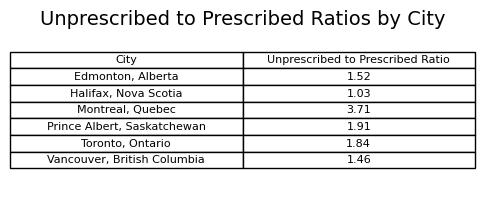

In [123]:
grouped_data.rename(columns={'GEO' : 'City'}, inplace=True)
grouped_data= grouped_data[['City', 'Unprescribed to Prescribed Ratio']]

grouped_data['Unprescribed to Prescribed Ratio']= grouped_data['Unprescribed to Prescribed Ratio'].round(2)
#grouped_data.drop(columns=['Prescribed', 'Unprescribed'], inplace=True)
# Create a new figure
fig, ax = plt.subplots(figsize=(6, 2))  # Set the figure size

# Hide axes
ax.axis('tight')
ax.axis('off')

# Create a table
table = ax.table(cellText=grouped_data.values,
                 colLabels=grouped_data.columns,
                 cellLoc='center',
                 loc='center')

# Set the title (optional)
plt.title('Unprescribed to Prescribed Ratios by City', fontsize=14)

# Save the table as an image
plt.savefig('unprescribed_prescribed_ratios.png', bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()

# Voilin plot

C:\Users\warda\AppData\Local\Temp\ipykernel_15476\2207918021.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




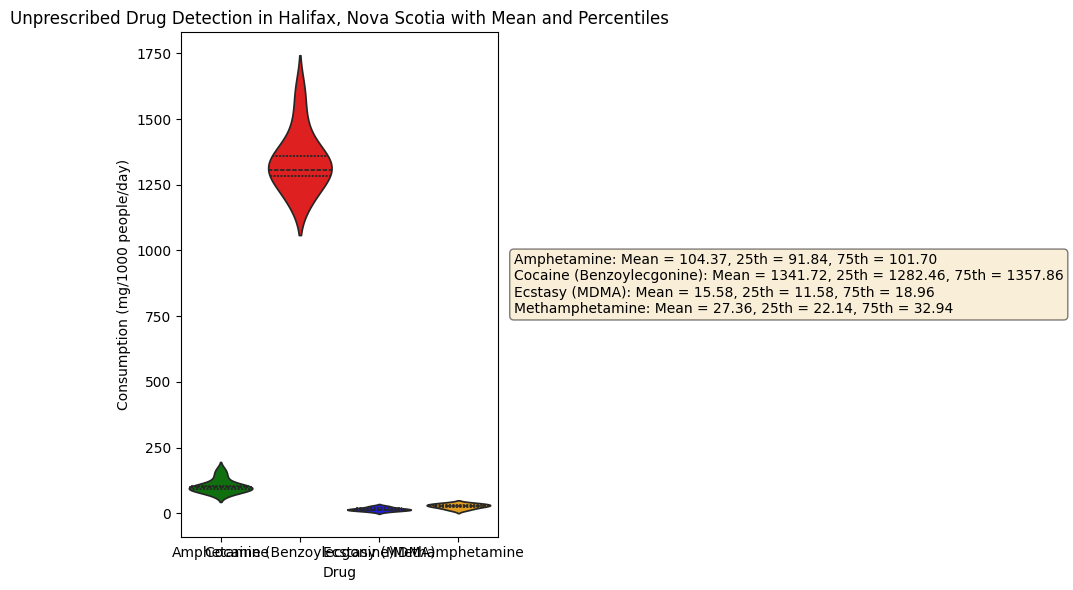

C:\Users\warda\AppData\Local\Temp\ipykernel_15476\2207918021.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




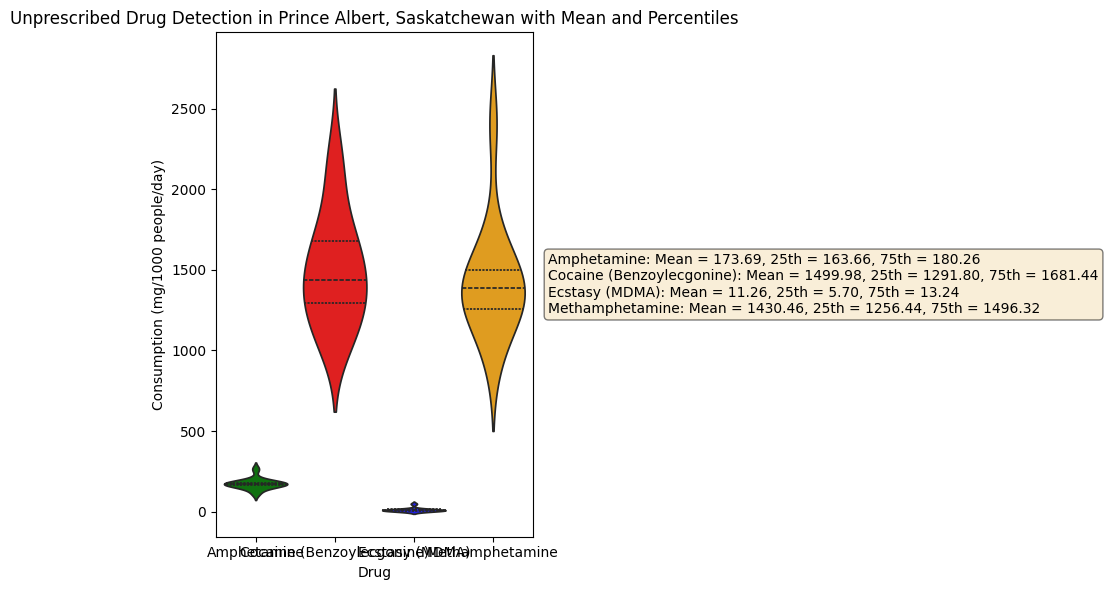

C:\Users\warda\AppData\Local\Temp\ipykernel_15476\2207918021.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




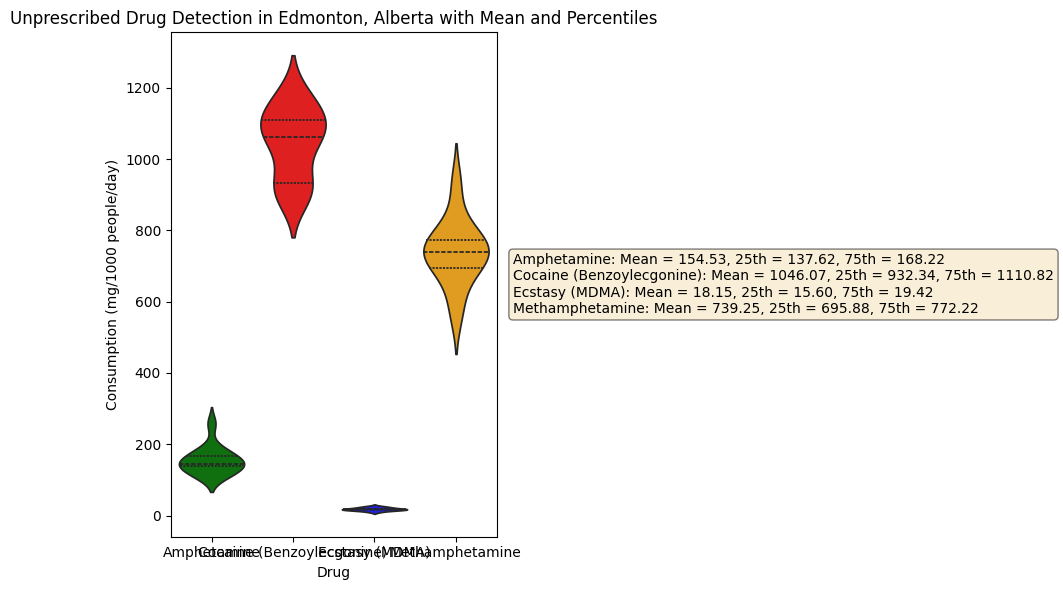

In [124]:
# Define the cities and filter the dataframe
cities = ['Halifax, Nova Scotia', 'Prince Albert, Saskatchewan', 'Edmonton, Alberta']
top3df = df[df['GEO'].isin(cities)].copy()
top3df = top3df[top3df['Prescribed'] != 'Prescribed']
top3df = top3df.reset_index(drop=True)

# Loop through each city and create violin plots
for city in cities:
    plt.figure(figsize=(10, 6))
    city_data = top3df[top3df['GEO'] == city]
    
    # Collect all values for y-axis limits
    all_values = city_data['VALUE'].tolist()
    #y_limits = (min(all_values), max(all_values))

    ax = sns.violinplot(x='Measure', y='VALUE', data=city_data, palette=['green','red', 'blue', 'orange'], inner='quartile')
    
    # Calculate mean and percentiles
    means = city_data.groupby('Measure')['VALUE'].mean()
    percentiles = city_data.groupby('Measure')['VALUE'].quantile([0.25, 0.75]).unstack()
    
    textstr = '\n'.join([
        f'{measure}: Mean = {mean:.2f}, 25th = {percentiles.loc[measure, 0.25]:.2f}, 75th = {percentiles.loc[measure, 0.75]:.2f}'
        for measure, mean in means.items()
    ])
    
    # Add text box
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.gca().text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10,
                   verticalalignment='center', bbox=props)
    
    # Set the same y-axis limits for all plots
    #plt.ylim(y_limits)
    
    # Adding title and labels
    plt.title(f'Unprescribed Drug Detection in {city} with Mean and Percentiles')
    plt.xlabel('Drug')
    plt.ylabel('Consumption (mg/1000 people/day)')
    
    plt.savefig(f'Violin Plot {city}.png', format='png', dpi=300)
    plt.tight_layout()
    plt.show()


# Correlation matrix

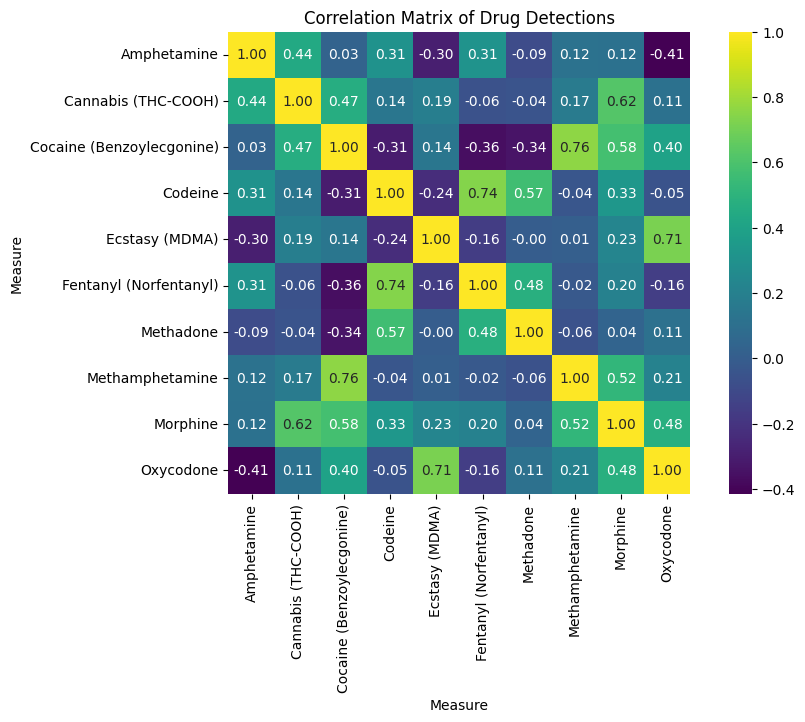

In [125]:
# Pivot the DataFrame to get drugs as columns and REF_DATE as index
df_pivot = df.pivot_table(index='REF_DATE', columns='Measure', values='VALUE', aggfunc='sum')

# Calculate the correlation matrix
correlation_matrix = df_pivot.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', square=True)
plt.title('Correlation Matrix of Drug Detections')
plt.savefig(f'Correlation.png', format='png', dpi=300)

plt.show()

# Regression

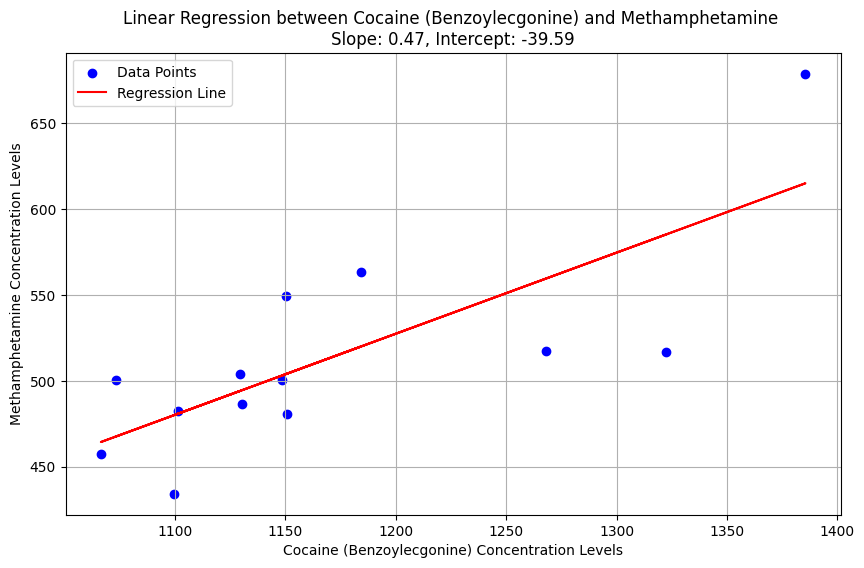

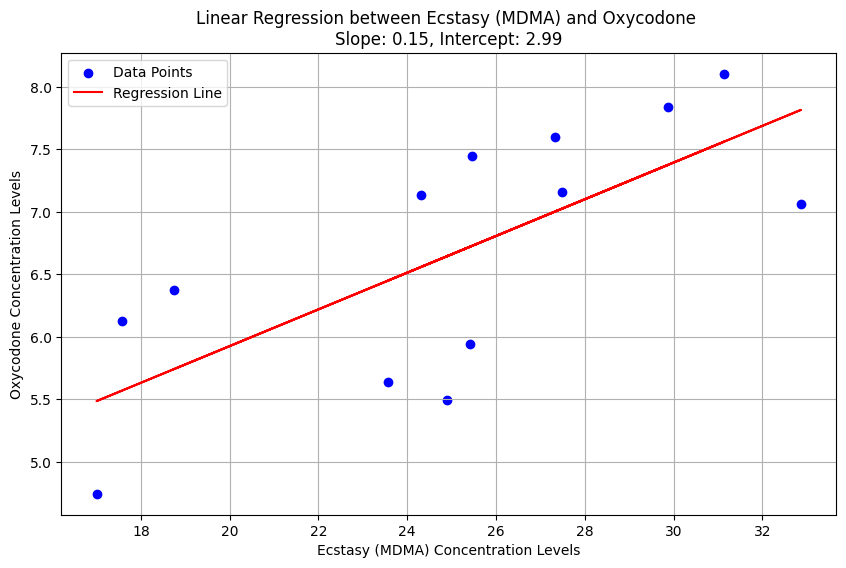

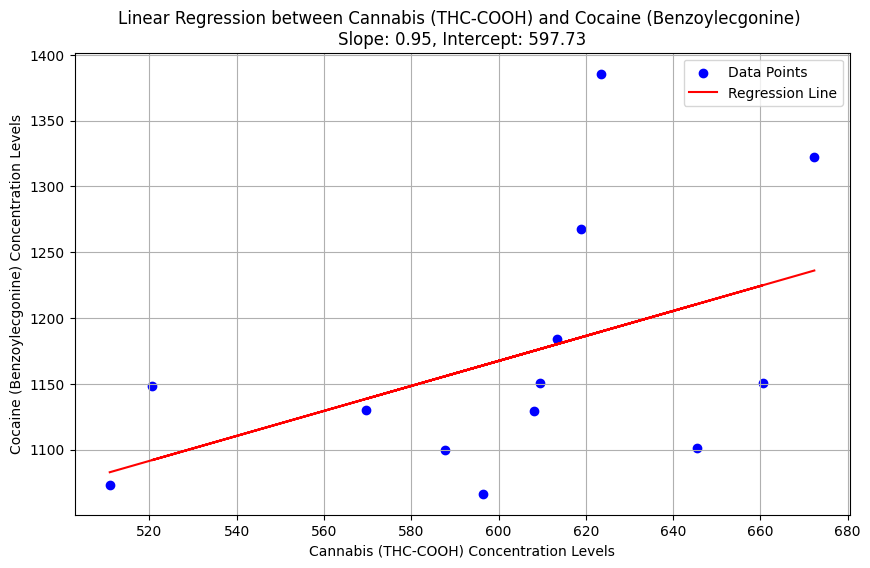

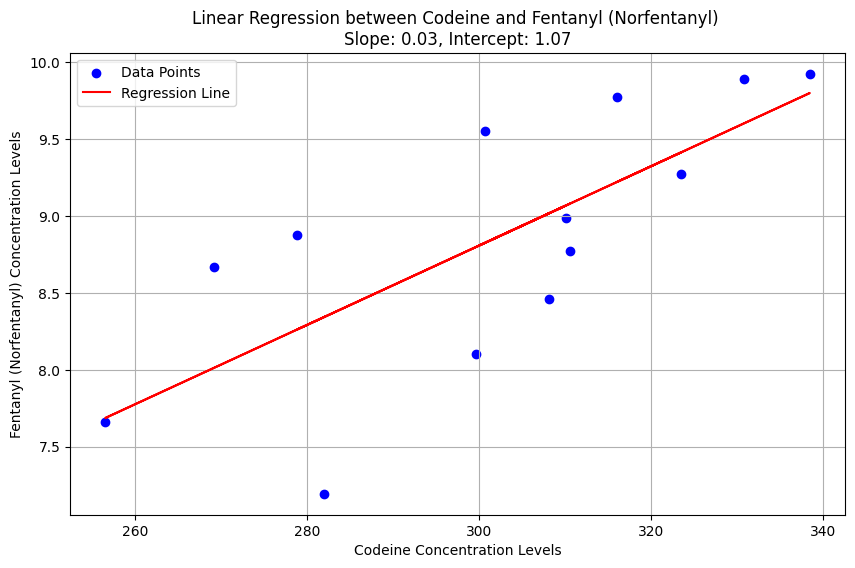

In [77]:
# Specify the drugs
drugs = [['Cocaine (Benzoylecgonine)', 'Methamphetamine'],
         ['Ecstasy (MDMA)', 'Oxycodone'],
         ['Cannabis (THC-COOH)', 'Cocaine (Benzoylecgonine)'],
         ['Codeine', 'Fentanyl (Norfentanyl)']]

# Filter the DataFrame for the specified drugs
for drug_pair in drugs:
    drug1_data = df[df['Measure'] == drug_pair[0]]
    drug2_data = df[df['Measure'] == drug_pair[1]]

    # Group by drug type and aggregate the VALUE column (mean, sum, etc.)
    drug1_grouped = drug1_data.groupby('REF_DATE')['VALUE'].mean().reset_index()
    drug2_grouped = drug2_data.groupby('REF_DATE')['VALUE'].mean().reset_index()

    # Merge the two dataframes on REF_DATE
    merged_data = pd.merge(drug1_grouped, drug2_grouped, on='REF_DATE', suffixes=('_drug1', '_drug2'))

    # Prepare data for linear regression
    X = merged_data['VALUE_drug1'].values.reshape(-1, 1)  # independent variable (drug1)
    y = merged_data['VALUE_drug2'].values  # dependent variable (drug2)

    # Fit the model
    model = LinearRegression()
    model.fit(X, y)

    # Extract slope and intercept
    slope = model.coef_[0]
    intercept = model.intercept_

    # Make predictions for plotting the regression line
    predictions = model.predict(X)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_data['VALUE_drug1'], merged_data['VALUE_drug2'], color='blue', label='Data Points')
    plt.plot(merged_data['VALUE_drug1'], predictions, color='red', label='Regression Line')

    # Add slope and intercept to the plot
    plt.title(f'Linear Regression between {drug_pair[0]} and {drug_pair[1]} \n'
              f'Slope: {slope:.2f}, Intercept: {intercept:.2f}')
    plt.xlabel(f'{drug_pair[0]} Concentration Levels')
    plt.ylabel(f'{drug_pair[1]} Concentration Levels')
    plt.legend()
    plt.grid()
    plt.savefig(f'Linear Regreression {drug_pair}.png', format='png', dpi=300)
    plt.show()
